# Homework 5

# Solution Sample

## Homework Submission Workflow

When you submit your work, follow the instructions on the [submission workflow page](https://www.cs.duke.edu/courses/fall18/compsci371d/homework/workflow.html) for full credit, but see the changes mentioned below.

**Important: Failure to do any of the following will result in lost points:**

- Submit **one** PDF file and **one** notebook per group

- Enter **all the group members** through the Gradescope GUI when you submit your PDF files. It is **not** enough to list group members in your documents

- Match each **answer** (not question!) with the appropriate page in Gradescope

- Avoid large blank spaces in your PDF file

**Important changes to homework preparation workflow:** _This assignment is different from the others in that you are required to run it on the Google Colaboratory, a cloud service that Google makes available for reseach in machine learning. This is necessary because some of the problems require you to train a deep network on hardware that is faster than what is typically available on a standard laptop or desktop, including a high-end GPU. Even if you do have a high-end GPU, please run your notebook on the Colaboratory, so we can grade your work consistently._

_**To work on this assignment, go to the [Colaboratory](https://colab.research.google.com) and upload the template notebook for this assignment through the `File` menu at the top of the Colaboratory page. Then work on the assignment, making sure to pay attention to instructions in Part 4 where you are asked to change the runtime type.**_

_**When you are done, download the notebook (after making sure that all the outputs from running the code show up properly), and proceed as usual to turn that notebook into a PDF file for submission.**_

#### Programming Notes

+ The Colaboratory is a cloud service. If a notebook sits idle for a long time, it automatically disconnects from its execution kernel, and you need to rerun all the cells.
+ Some of the cells in the Part on neural networks are to be run with different runtime types, as explained later. Because of this, you will not be able to just restart the notebook and run all its cells with a single command. Instead, you need to run the cells one at a time, changing runtime type as instructed. Make sure you do this once you are done with the assignment, making sure that the output from your code matches the text where you describe that output.
+ Depending on circumstances, changing the runtime type may erase some or all of the notebook state. This will require you to rerun the cells that generate state.
+ Training depends on random initialization of the network parameters. Because of this, your results may vary relative to the sample solution, even if your code is no different. Results may also vary from run to run.

## Part 1: Exam-Style Questions, Set 1

The small neural net in the figure below uses the ReLU as the nonlinearity at the output of each neuron. The values specified in the hollow circles are biases, and the values along the edges are gains. Weigths number 1, 2, 3 refer to the first neuron, 4, 5,6 to the second, 7, 8, 9 to the third.

![a simple neural network](https://www2.cs.duke.edu/courses/spring19/compsci527/homework/5/netSimple.png)

### Problem 1.1

Are all the layers in the net above fully connected?

### Answer

Yes.

### Problem 1.2

What is the output $y$ from the net above when the input is as follows?

$$
x_1 = 0 \;\;\; \text{and}\;\;\; x_2 = 3
$$

### Answer

$$
y = 4
$$

### Problem 1.3

What is the gradient $\mathbf{g}$ of the output $y$ of the network above with respect to the weight vector

$$
\mathbf{w} = [w_1,\ w_2,\ w_3,\ w_4,\ w_5,\ w_6,\ w_7,\ w_8,\ w_9]^T
$$

when the input has the values given in the previous problem? Just give the result if you are confident of your answer.

### Answer

Activations can be computed in a forward pass (from the previous problem) to be

$$
a_1 = 0 \;\;\;,\;\;\; a_2 = 3 \;\;\;,\;\;\; y = a_3 = 4\;.
$$

With these values, we have

\begin{eqnarray*}
y &=& w_7 a_1 + w_8 a_2 + w_9 \\
a_1 &=& 0 \\
a_2 &=& w_4 x_1 + w_5 x_2 + w_6
\end{eqnarray*}

Letting $g_k = \partial y/\partial w_k$, a backward pass yields the entries of $\mathbf{g}$:

$$
\begin{array}{lclcl}
g_7 = a_1 = 0 &,& g_8 = a_2 = 3 &,& g_9 = 1 \\
g_1 = 0 &,& g_2 = 0  &,& g_3 =  0 \\
g_4 = w_8 x_1 = 0 &,& g_5 = w_8 x_2 = 3 &,& g_6 = w_8 = 1 
\end{array}
$$

so that

$$
\mathbf{g} = [0, 0, 0, 0, 3, 1, 0, 3, 1] ^T\;.
$$



## Part 2: Exam-Style Questions, Set 2




Let $\mathbf{p} = f(\mathbf{x})$ be the output of the network's soft-max layer of some neural network classifier with $K$ layers when the network's input is $\mathbf{x}$. The classifier's output is then

$$
\hat{y} = \arg\max \mathbf{p}\;.
$$

If $y_n$ is the true label corresponding to training input $\mathbf{x}_n$, the loss is $\ell_n = \ell(y_n, f(\mathbf{x}_n))$ for some appropriate loss function $\ell(y, \mathbf{p})$.

We saw in class that if $\mathbf{x}^{(k)}$ is the output from layer $k$ and $\mathbf{w}^{(k)}$ is a vector with all the parameters in layer $k$, then back-propagation computes the partial derivatives by the following recursion,  where $\mathbf{x}^{(0)} = \mathbf{x}$ is the input to the network and $\mathbf{x}^{(K)} = \mathbf{p}$:

\begin{eqnarray*}
\frac{\partial \ell_n}{\partial \mathbf{w}^{(k)}} &=& \frac{\partial \ell_n}{\partial \mathbf{x}^{(k)}} \frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{w}^{(k)}}
\;\;\;\text{for}\;\;\; k = K,\ldots, 1 \\
\frac{\partial \ell_n}{\partial \mathbf{x}^{(k-1)}} &=& \frac{\partial \ell_n}{\partial \mathbf{x}^{(k)}} \frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{x}^{(k-1)}}
\;\;\;\text{for}\;\;\; k = K,\ldots, 2\\
\frac{\partial \ell_n}{\partial \mathbf{x}^{(K)}} &=& \frac{\partial \ell}{\partial \mathbf{p}}
\end{eqnarray*}

The derivatives above are computed for the $n$-th training sample $(\mathbf{x}_n, y_n)$ and for the values of $\mathbf{w}^{(k)}$ that are current at any given point during training.

### Problem 2.1

Suppose that the network has only fully-connected layers (with ReLU nonlinearities) before the soft-max. Refer in detail to the equations given above to explain clearly why training would not work if the parameter vector $\mathbf{w} = [\mathbf{w}^{(1)},\ldots, \mathbf{w}^{(K)}]^T$ is initialized with zeros for training.

### Answer

If $V^{(k)}$ is the matrix of gains in layer $k$, we have

$$
\frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{x}^{(k-1)}} = V^{(k)}
$$

and if all the weights are initialized to zero, this Jacobian is zero. Therefore, $\frac{\partial \ell_n}{\partial \mathbf{x}^{(k-1)}}$ is also zero for $k = 2,\ldots, K$ (second equation above), and therefore, from the first equation, $\frac{\partial \ell_n}{\partial \mathbf{w}^{(k)}} = 0$ for all $k$. Thus, the gradient is always zero, and no progress occurs during training.

### Problem 2.2

A neural net classifier with only fully-connected layers (with ReLU nonlinearities) and a soft-max layer at its output has parameter vector $\mathbf{w}$, and the network implements the function $f(\mathbf{x}, \mathbf{w})$ for any network input $\mathbf{x}$. Is $\mathbf{w} = \mathbf{0}$ a stationary point for the function $\phi(\mathbf{w}) = f(\mathbf{x}, \mathbf{w})$ when $\mathbf{x}$ is fixed? Justify your answer.

### Answer

Yes, $\mathbf{w} = \mathbf{0}$ is a stationary point for $\phi(\mathbf{w})$, because we saw in the previous problem that $\phi$ has zero gradient there.

### Problem 2.3

Stochastic gradient descent with momentum is used to train a certain neural network with $m$ parameters. Just before iteration $t$ of training is performed, the parameter vector has value $\mathbf{w}_t$, and the velocity (or step) is $\mathbf{v}_t = \mathbf{a}$, where $\mathbf{a}$ is some nonzero vector in $\mathbb{R}^m$ (refer to the class notes for notation). The momentum coefficient is kept constant at $\mu = 0.9$ throughout training. If the risk function has a saddle point at $\mathbf{w}_t$, what is the step $\mathbf{v}_{t+1}$ at iteration $t$?

### Answer

The step at iteration $t$ is $\mathbf{v}_{t+1} = 0.9\, \mathbf{a}$.

### Problem 2.4

A friend of yours argues that in the situation described in the previous problem, the steps after iteration $t$ decay exponentially. Her argument is based on the fact that the risk is at a saddle point at $\mathbf{w}_t$, and the momentum coefficient is constant, so that $\mathbf{v}_{t+\tau} = \mu^{\tau}\mathbf{a}$, an exponential decay. Explain why your friend's argument is wrong.

### Answer

While the step at iteration $t$ is $\mathbf{v}_{t+1} = \mu\, \mathbf{a}$, the subsequent step is

$$
\mathbf{v}_{t+2} = \mu \mathbf{v}_{t+1}- \alpha \nabla L_T(\mathbf{w}_{t+1}) \;.
$$

Since the gradient of the risk function at $\mathbf{w}_{t+1}$ is no longer necessarily zero, the new step is not necessarily equal to $\mu \mathbf{v}_{t+1} = \mu^2 \mathbf{a}$, as would be required for an exponential decay.

### Problem 2.5

In the situation described in Problem 2.3, will the training algorithm always eventually converge back towards $\mathbf{w}_t$? Explain your answer briefly and clearly.

### Answer

No, training will not necessarily converge towards $\mathbf{w}_t$. The step $\mathbf{v}_{t+1}$ moves the algorithm away from the saddle point. The new negative gradient at $\mathbf{w}_{t+1}$ may point away from $\mathbf{w}_t$, and it is then possible that the algorithm eventually escapes the saddle point toward parameter vectrors with lower risk, never to return to $\mathbf{w}_t$.

## Part 3: Exam-Style Questions, Set 3

The following problems take you through the computation of the set of all least-squares solutions to the following linear system:

\begin{eqnarray*}
3x + 4y &=& 2\\
3x + 4y &=& 3
\end{eqnarray*}

and the solutions to a related optimization problem.
All the answers to the questions in this problem are numerical and exact. They refer only to the data given in the problem, and no more general answers are required. You may leave your answers in the form of fractions, with expressions like the following:

$$
\frac{\sqrt{3}}{2} \left[\begin{array}{c} 2\\-5\end{array}\right]\;,
$$

but please simplify as much as possible.

_As usual, it is easiest to answer these questions using software (and perhaps guess the exact values from the approximate ones output by your code). However, this would rob you of the opportunity to understand this material and to practice for the exam. **In any event, no answers will be accepted to problems in this part that embed software in your submission.**_


### Problem 3.1

What are $A$ and $\mathbf{b}$ if we write the system in this problem in the following form?
$$
A \mathbf{x} = \mathbf{b}
$$

### Answer

$$
A = \left[\begin{array}{cc} 3 & 4\\3 & 4\end{array}\right] \;\;\;and\;\;\; \mathbf{b} = \left[\begin{array}{c} 2\\3\end{array}\right]\;.
$$

### Problem 3.2

What is the rank of $A$?

### Answer

1

### Problem 3.3

Give a _unit_ column vector $\mathbf{r}$ that spans the row space of $A$.

### Answer

$$
\mathbf{r} = \frac{1}{5} \left[\begin{array}{c} 3\\4\end{array}\right]\;.
$$

### Problem 3.4

Give a _unit_ column vector $\mathbf{n}$ that spans the null space of $A$.

### Answer

$$
\mathbf{n} = \frac{1}{5} \left[\begin{array}{c} -4\\3\end{array}\right]\;.
$$

### Problem 3.5

Write the matrix $V$ in the SVD $A = U\Sigma V^T$ of $A$.

### Answer

$$
V = \left[\begin{array}{cc} \mathbf{r} & \mathbf{n}\end{array}\right] = \frac{1}{5} \left[\begin{array}{cc} 3 & -4\\ 4 & 3\end{array}\right]
$$
(the sign of either column can be flipped for an equally acceptable answer).

### Problem 3.6

Compute the matrices $U$ and $\Sigma$ in the SVD of $A$. [Hint: compute $U\Sigma$ first.]

### Answer

$$
U\Sigma = AV = \frac{1}{5} \left[\begin{array}{cc} 3 & 4\\3 & 4\end{array}\right]
\left[\begin{array}{cc} 3 & -4\\ 4 & 3\end{array}\right] =
\frac{1}{5} \left[\begin{array}{cc} 25 & 0\\25 & 0\end{array}\right] =
\left[\begin{array}{cc} 5 & 0\\5 & 0\end{array}\right]
$$

so that the first column of $U$ is $[1, 1]^T$ normalized to unit norm:

$$
\mathbf{u}_1 = \frac{\sqrt{2}}{2} \left[\begin{array}{c} 1\\1\end{array}\right]\;.
$$

The second column of $U$ is orthogonal to the first and has unit norm, so

$$
U = \frac{\sqrt{2}}{2} \left[\begin{array}{cc} 1 & -1\\1 & 1\end{array}\right]
$$

(the sign of the second column can be flipped for an equally good answer, and the sign of the first column depends on that of $\mathbf{r}$).

The matrix $\Sigma$ is

$$
\Sigma = \left[\begin{array}{cc} \sigma & 0\\0 & 0\end{array}\right]
$$

because $A$ is rank 1, and $\sigma$ is $5$ divided by the normalization factor of $\mathbf{u}_1$:

$$
\sigma = \frac{10}{\sqrt{2}} = 5\sqrt{2}\;,
$$

so

$$
\Sigma = \left[\begin{array}{cc} 5\sqrt{2} & 0\\0 & 0\end{array}\right] \;.
$$

### Problem 3.7

Compute the pseudo-inverse $A^{\dagger}$ of $A$.

### Answer

$$
A^{\dagger} = V \Sigma^{\dagger} U^T = \frac{1}{5} \left[\begin{array}{cc} 3 & -4\\ 4 & 3\end{array}\right]
\frac{1}{5\sqrt{2}} \left[\begin{array}{cc} 1 & 0\\0 & 0\end{array}\right] 
\frac{\sqrt{2}}{2} \left[\begin{array}{cc} 1 & 1\\-1 & 1\end{array}\right] =
\frac{1}{50} \left[\begin{array}{cc} 3 & -4\\ 4 & 3\end{array}\right]
\left[\begin{array}{cc} 1 & 1\\0 & 0\end{array}\right] 
= \frac{1}{50} \left[\begin{array}{cc} 3 & 3\\ 4 & 4\end{array}\right]\;.
$$

### Problem 3.8

Find the minimum-norm least-squares solution $\mathbf{x}^*$ of the system $A\mathbf{x} = \mathbf{b}$.

### Answer

$$
\mathbf{x}^* = A^{\dagger} \mathbf{b} = \frac{1}{50} \left[\begin{array}{cc} 3 & 3\\ 4 & 4\end{array}\right]
\left[\begin{array}{c} 2\\3\end{array}\right] = \frac{1}{50} \left[\begin{array}{c} 15\\20\end{array}\right]
= \frac{1}{10} \left[\begin{array}{c} 3\\4\end{array}\right]\;.
$$

### Problem 3.9

Give an expression for the set $S$ of all least-squares solutions of the system $A\mathbf{x} = \mathbf{b}$.

### Answer

The set $S$ is the minimum-norm solution plus any vector in the null space:

$$
S = \{\mathbf{x}^* \;+\; \alpha \mathbf{n} \} = \left\{\left[\begin{array}{c} 0.3\\0.4\end{array}\right] \;+\; \alpha\left[\begin{array}{c} -0.8\\0.6\end{array}\right] \right\}
= \left\{\left[\begin{array}{c} 0.3 - 0.8 \alpha\\0.4 + 0.6\alpha\end{array}\right]\right\}
$$

for any $\alpha\in\mathbb{R}$.

### Problem 3.10

Find all the solutions to

$$
 \hat{\mathbf{x}} = \arg\min_{\|\mathbf{x}\| = 1} \|A\mathbf{x}\|\;.
$$

### Answer

There are two solutions:

$$
\hat{\mathbf{x}} = \pm \mathbf{n} = \pm \left[\begin{array}{c} -0.8\\0.6\end{array}\right]\;.
$$

## Part 4: Neural Networks

The code in this part is somewhat modified from the [Keras documentation](https://keras.io/examples/cifar10_cnn/). It downloads the CIFAR-10 dataset, a set of 60000 labeled images grouped in 10 categories, which it splits into training, validation, and test sets. It then defines a function `network` that returns a simple convolutional neural network (the `model`), and a function `train` that trains the model for a single epoch by default, checking performance on the validation set.The function `train` also saves the trained model in a file in the cloud and evaluates the model on the test data. Finally, it returns a history of training and validation accuracies achieved after each epoch of training. The function `train` uses SGD as the default optimizer.

_**Important:**_ Make sure you select Python 3 through the `Runtime->Change runtime type` menu at the top of the notebook. Also set the hardware acceleration to `None` in that same menu. We will turn on GPU acceleration later on. TPU acceleration is not always available, so we won't use it.

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

num_classes = 10

# The data, split between train, validation, and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
(x_train, x_validate, y_train, y_validate) = train_test_split(x_train, y_train,
                                                             test_size=0.2)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training samples')
print(x_validate.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_validate = keras.utils.to_categorical(y_validate, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_validate = x_validate.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_validate /= 255
x_test /= 255

Using TensorFlow backend.


170500096/170498071 [==============================] - 31s 0us/step
x_train shape: (40000, 32, 32, 3)
40000 training samples
10000 validation samples
10000 test samples


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

activation_function = 'relu'

def network(activation_function='relu'):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                  input_shape=x_train.shape[1:]))
  model.add(Activation(activation_function))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation(activation_function))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation(activation_function))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation(activation_function))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation(activation_function))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  return model

model = network()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from keras.preprocessing.image import ImageDataGenerator
import os
from math import ceil

def train(model, epochs=1,
          opt = keras.optimizers.SGD(lr=0.01, momentum=0.7, decay=0.001),
          verbose=2):

  batch_size = 32
  save_dir = os.path.join(os.getcwd(), 'saved_models')
  model_name = 'keras_cifar10_trained_model.h5'

  # Configure the model for training
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  history = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(x_validate, y_validate),
                      shuffle=True,
                      verbose=verbose)

  # Save model and weights
  if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
  model_path = os.path.join(save_dir, model_name)
  model.save(model_path)

  # Score trained model.
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])
  return [history.epoch, history.history['acc'], history.history['val_acc']]

### Problem 4.1


Using Stochastic Gradient Descent (SGD) with the default parameters in `train`, train the model for one epoch _with no hardware acceleration_.

Show your call to `train` and the outputs it generates. Is validation accuracy a reasonably good estimate of test accuracy?

#### Programming Notes

+ Hardware acceleration is turned off through the `Runtime->Change runtime type` menu at the top of the notebook, and selecting `None` for hardware acceleration.

+ Depending on circumstances, after you change the runtime type, some or all of the notebook state may be lost. This will require you to rerun some of the cells above.

+ Tensorflow may generate warning messages that depend on how the Colaboratory interface is implemented. These messages are typically harmless.

### Answer

In [4]:
train(model)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/1
 - 237s - loss: 2.0346 - acc: 0.2452 - val_loss: 1.7759 - val_acc: 0.3665
10000/10000 [==============================] - 17s 2ms/step
Test loss: 1.7724207149505615
Test accuracy: 0.3771


[[0], [0.2452], [0.3665]]

Validation accuracy is a good estimate of test accuracy.

### Problem 4.2

Repeat the previous experiment _after turning on GPU acceleration_ from the `Runtime->Change runtime type` menu.

Are the accuracy values the same as before? Explain why or why not. What is the approximate ratio of running times of CPU (no acceleration) versus GPU training?

### Answer

In [6]:
train(model)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/1
 - 17s - loss: 1.9952 - acc: 0.2668 - val_loss: 1.7304 - val_acc: 0.3726
10000/10000 [==============================] - 1s 122us/step
Test loss: 1.7190162654876708
Test accuracy: 0.3841


[[0], [0.2668], [0.3726]]

The accuracy values above are different from those achieved in the previous problem. The reason is that the model was re-initialized with random values, and these values are in general different every time.The SGD paths from different initializers may be different.

The running time is now about 14 times faster than with no acceleration.

### Problem 4.3

We keep GPU acceleration turned on from now on.

Repeat the experiment above with the ADAM optimizer with the default parameters. This optimizer selects the descent step size adaptively. The ADAM optimizer is invoked by using parameter `opt = keras.optimizers.Adam()` in `train`.

Compare accuracies and running times with those achieved in the previous experiment.

### Answer

In [7]:
train(model, opt=keras.optimizers.Adam())

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
 - 16s - loss: 1.4922 - acc: 0.4553 - val_loss: 1.2654 - val_acc: 0.5424
10000/10000 [==============================] - 1s 139us/step
Test loss: 1.2508435594558716
Test accuracy: 0.5453


[[0], [0.455275], [0.5424]]

The running time is about the same as for SGD. However,  accuracies after one epoch are significantly better. Of course, results may vary.

### Problem 4.4

We use the ADAM optimizer with default parameters from now on.

Repeat the previous experiment with 30 epochs of training instead of 1 (`epochs=30`). This time, store the value returned by `train`, as you will need it for plotting.

When done, plot both training accuracy and validation accuracy as functions of epoch number on the same diagram. Label the axes and add a legend to specify which plot is which.

Do you think that the classifier would perform much better if you were to train longer? Explain briefly.

#### Programming Notes

+ Look at the definition of `train` to figure out what the output from that function contains.
+ Set the value of the `verbose` parameter in the call to `train` to 0 to suppress output, which would be too long to include in your PDF file. You can estimate from your previous experiments how long the code will take to run. Alternatively, set `verbose` to 2 in early test runs, but then set it to 0 in your final run.

### Answer

10000/10000 [==============================] - 1s 125us/step
Test loss: 0.7215502796649933
Test accuracy: 0.7787


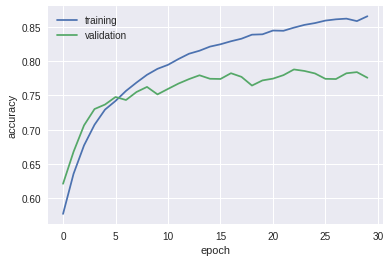

In [8]:
history = train(model, epochs=30, opt=keras.optimizers.Adam(), verbose=0)

from matplotlib import pyplot as plt
%matplotlib inline

def plot_accuracy(history):
  plt.plot(history[0], history[1], label='training')
  plt.plot(history[0], history[2], label='validation')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()
  
plot_accuracy(history)

Training longer is likely to be only marginally beneficial if at all. While the training accuracy is still on the rise and is likely to keep improving, validation accuracy is rather flat, indicating that the classifier is overfitting.

### Problem 4.5

Suggest at least three different ways to improve the performance of the classifier defined in this Part. For each way, explain why that would help. This is an open-ended question, and answers may vary. Do _not_ implement your suggestions, and do _not_ refer to techniques we have not covered in class (such as batch normalization or other techniques you may have heard of).

If you suggest more than three ways, we will grade you for the best ones. However, we _will_ deduct points for patently wrong statements in any of your suggestions.

### Answer

+ Use 50000 images for training, and check validation performance by cross-validation, rather than by setting 10000 of the 50000 images aside for this purpose as done above. This will increase the size of the training set, somewhat improving generalization.
+ Use data augmentation. This results in the training algorithm effectively seeing more data, and the ratio of training set size to number of parameters improves.
+ Add more layers to the network, to give it more expressive power. AlexNet works better on harder problems, and has more layers. This may require adding data to the training set.
+ Train the network multiple times with different initializers, and pick the network that yields the highest validation accuracy. Training converges to local minima of the risk function, and different minima may perform differently.
+ Train several networks with different initializers and/or on different subsets of the data, and combine their predictions through a majority vote. This combination will smooth out overfitting errors and lead to better generalization.

